In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import mean_squared_log_error

Transformando os dados em arrays: 

In [2]:
dataset = pd.read_csv('Carga_ons_2019_fev.csv', sep= ';')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Visualizando os dados do dataframe:

In [3]:
dataset.head()

,Semana,Carga
0,1,43231
1,2,41038
2,3,40694
3,4,39387
4,5,40650


Visualizando a informação do dataframe: 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Semana  73 non-null     int64
 1   Carga   73 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


Criando a função de erro:

In [5]:
def rmsle(ytrue,ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[35238.37 39052.  ]
 [34975.24 40432.  ]
 [37014.54 35246.  ]
 [35633.07 36530.  ]
 [36619.83 34457.  ]
 [36751.4  34161.  ]
 [33856.91 32270.  ]
 [35172.59 41264.  ]
 [36225.13 35982.  ]
 [38001.29 39572.  ]
 [35698.86 35703.  ]
 [34843.67 41980.  ]
 [35830.43 38936.  ]
 [34514.75 34934.  ]
 [36290.91 39196.  ]]


In [34]:
z = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
z

array([[35238.37, 39052.  ],
       [34975.24, 40432.  ],
       [37014.54, 35246.  ],
       [35633.07, 36530.  ],
       [36619.83, 34457.  ],
       [36751.4 , 34161.  ],
       [33856.91, 32270.  ],
       [35172.59, 41264.  ],
       [36225.13, 35982.  ],
       [38001.29, 39572.  ],
       [35698.86, 35703.  ],
       [34843.67, 41980.  ],
       [35830.43, 38936.  ],
       [34514.75, 34934.  ],
       [36290.91, 39196.  ]])

In [9]:
X_test

array([[50],
       [54],
       [23],
       [44],
       [29],
       [27],
       [71],
       [51],
       [35],
       [ 8],
       [43],
       [56],
       [41],
       [61],
       [34]])

In [10]:
y_pred.reshape(len(y_pred),1)

array([[35238.37],
       [34975.24],
       [37014.54],
       [35633.07],
       [36619.83],
       [36751.4 ],
       [33856.91],
       [35172.59],
       [36225.13],
       [38001.29],
       [35698.86],
       [34843.67],
       [35830.43],
       [34514.75],
       [36290.91]])

In [33]:
dataset["Carga"].values

array([43231, 41038, 40694, 39387, 40650, 37688, 40928, 39572, 38564,
       38862, 38263, 36757, 37354, 36607, 36955, 36085, 34595, 35221,
       34463, 34295, 34007, 34751, 35246, 31881, 33234, 33632, 34161,
       33458, 34457, 34205, 34070, 35488, 37418, 39196, 35982, 36047,
       36642, 38467, 36970, 39361, 38936, 36999, 35703, 36530, 36855,
       37189, 38757, 35028, 36089, 39052, 41264, 38475, 40283, 40432,
       38842, 41980, 36906, 37249, 39453, 41009, 34934, 35083, 32508,
       31409, 30798, 31695, 31353, 31343, 30582, 31385, 32270, 32934,
       34671])

In [26]:
y = y_pred.reshape(len(y_pred),1)

Calculando o erro:

In [12]:
p = y_pred
error = rmsle(y_test, p)
print('Mean Error = %.5f' % np.mean(error))


Mean Error = 0.08975


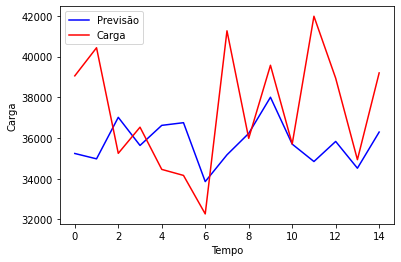

In [36]:

plt.plot(y_pred, color = 'blue', label = 'Previsão')
plt.plot(y_test, color = 'red',label = 'Carga' )

plt.xlabel('Tempo')
plt.ylabel('Carga')
plt.legend()
plt.show()